In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [66]:
# Load data
raw_data = np.load('./data.npy')

# Standardize data
data_std = StandardScaler().fit_transform(raw_data)

In [67]:
# Implementing 1st method: K-means clustering method
res = []
r = range(2, 15)
for x in r:
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(data_std)
    labels = kmeans.labels_
    res.append(silhouette_score(data_std, labels))

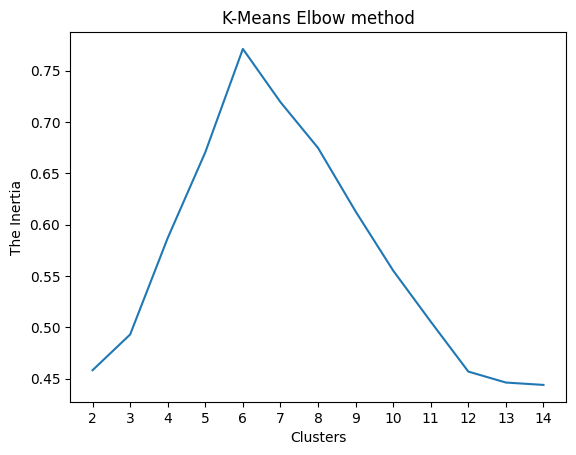

In [68]:
# We are gonna use the elbow method as heuristic to chose the number of clusters
plt.plot(r, res)
plt.xticks(r)
plt.title('K-Means Elbow method')
plt.xlabel('Clusters')
plt.ylabel('The Inertia')
plt.show()

In [69]:
# Implementing 2nd method: Hierarchical clustering method
res = []
r = range(2, 15)
for x in r:
    h = AgglomerativeClustering(n_clusters=x)
    h_fit = h.fit_predict(data_std)
    res.append(silhouette_score(data_std, h_fit))

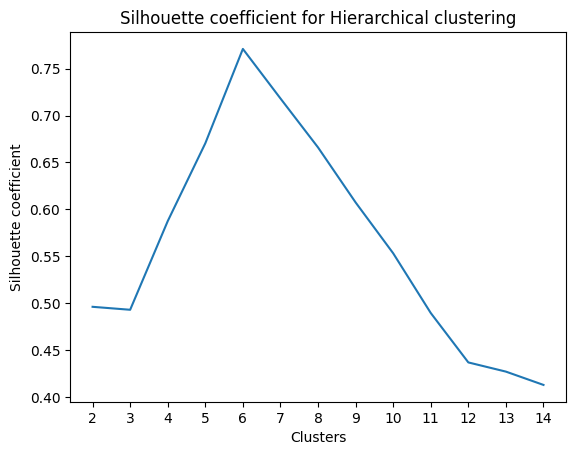

In [70]:
plt.plot(r, res)
plt.xticks(r)
plt.title('Silhouette coefficient for Hierarchical clustering')
plt.xlabel('Clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

In [71]:
# We can see with the silhouette method that 6 is also the optimal number of clusters with Hierarchical clustering
# We are going to calculte the silhouette coefficient for 6 clusters
h = AgglomerativeClustering(n_clusters=6)
h_fit = h.fit_predict(data_std)
h_sil = silhouette_score(data_std, h_fit)
print("Hierarchical Silhouette coefficient:", h_sil)


Hierarchical Silhouette coefficient: 0.7710654982382233


In [64]:
#We can see that both methods give the same result (6 clusters is the optimal solution)
#But the results are much clearer with the 2nd method (Hierarchical clustering method + Silhouette coefficient)
#The graph is easier to read than the 1st method (K-means clustering method + elbow method)